In [1]:
# Import necessary utilities

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Import Dow Jones Industrial Average Dataset beginning on January 1st, 2020 found here:
# https://finance.yahoo.com/quote/%5EDJI/history?period1=1577836800&period2=1584403200&interval=1d&filter=history&frequency=1d

DJI_DATASET = r"./Data/^DJI.csv"
disp_data = pd.read_csv(DJI_DATASET)
disp_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,28638.970703,28872.800781,28627.769531,28868.800781,28868.800781,251820000
1,2020-01-03,28553.330078,28716.310547,28500.359375,28634.880859,28634.880859,239590000
2,2020-01-06,28465.500000,28708.019531,28418.630859,28703.380859,28703.380859,252760000
3,2020-01-07,28639.179688,28685.500000,28565.279297,28583.679688,28583.679688,258900000
4,2020-01-08,28556.140625,28866.179688,28522.509766,28745.089844,28745.089844,291750000
5,2020-01-09,28851.970703,28988.009766,28844.310547,28956.900391,28956.900391,275060000
6,2020-01-10,28977.519531,29009.070313,28789.099609,28823.769531,28823.769531,237830000
7,2020-01-13,28869.009766,28909.910156,28819.429688,28907.050781,28907.050781,249830000
8,2020-01-14,28895.500000,29054.160156,28872.269531,28939.669922,28939.669922,287440000
9,2020-01-15,28901.800781,29127.589844,28897.349609,29030.220703,29030.220703,260270000


In [22]:
# Calculate Average Change between opening and closing price per day

disp_data["Average"] = (disp_data["Open"] + disp_data["Close"]) / 2


# Convert dates to datetime format that matches COVID-19 data

disp_data["Date"] = pd.to_datetime(disp_data["Date"], errors = 'ignore', yearfirst = True)

# Drop Unnecessary columns
dji_date_data = disp_data.drop(columns = ["Open", "High", "Low", "Close", "Volume", "Adj Close"])

# Isolate to only January 22nd (only contains weekdays)
dji_date_data = dji_date_data.drop([0,1,2,3,4,5,6,7,8,9,10,11,12])
dji_date_data = dji_date_data.reset_index()
dji_date_data = dji_date_data.drop(columns = ["index"])

# Check results
dji_date_data

,Date,Average
0,2020-01-22,29224.950195
1,2020-01-23,29135.554688
2,2020-01-24,29110.060547
3,2020-01-27,28539.145507
4,2020-01-28,28658.564453
5,2020-01-29,28777.489258
6,2020-01-30,28749.799804
7,2020-01-31,28534.534180
8,2020-02-03,28359.730469
9,2020-02-04,28752.185546


In [23]:
# Import S&P 500 data found here: https://finance.yahoo.com/quote/%5EGSPC/history?period1=1579651200&period2=1584316800&interval=1d&filter=history&frequency=1d
US_SandP500 = r"C:\Users\William\Documents\Github\Coronadex\Data\^GSPC.csv"
SandP_data = pd.read_csv(US_SandP500)
SandP_data["Average"] = (SandP_data["Open"] + SandP_data["Close"]) / 2
SandP_data = SandP_data.drop(columns = ["Open", "High", "Low", "Close", "Volume", "Adj Close"])
SandP_data

,Date,Average
0,2020-01-22,3325.885010
1,2020-01-23,3320.655029
2,2020-01-24,3314.285034
3,2020-01-27,3245.394897
4,2020-01-28,3265.795044
5,2020-01-29,3281.429931
6,2020-01-30,3270.054931
7,2020-01-31,3253.925049
8,2020-02-03,3242.289917
9,2020-02-04,3289.100097


In [24]:
# Import Italy Dow Jones Titans 30 Index found here: 
# https://us.spindices.com/indices/equity/dow-jones-italy-titans-30-index-usd

ITALY_DATASET = r"C:\Users\William\Documents\Github\Coronadex\Data\italytitansindex.csv"
italy_data = pd.read_csv(ITALY_DATASET)
italy_data = italy_data[italy_data.columns[0:3]].dropna()
italy_data = italy_data.drop(columns = ["Dow Jones Italy Titans 30 Total Return Index (USD)"])
italy_data = italy_data.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,33,54]).reset_index().drop(columns = ["index"])
italy_data = italy_data.rename(columns = {"Effective date " : "Date"})
italy_data["Date"] = pd.to_datetime(italy_data["Date"], errors = 'ignore', yearfirst = True)
italy_data

,Date,Dow Jones Italy Titans 30 Index (USD)
0,2020-01-22,1725.65
1,2020-01-23,1719.94
2,2020-01-24,1734.47
3,2020-01-27,1691.01
4,2020-01-28,1732.68
5,2020-01-29,1741.31
6,2020-01-30,1716.91
7,2020-01-31,1685.17
8,2020-02-03,1696.37
9,2020-02-04,1723.13


In [25]:
# Import chine SSE (.000001) index
CHINA_SSE = r"C:\Users\William\Documents\Github\Coronadex\Data\000001.SS.csv"
SSE_data = pd.read_csv(CHINA_SSE)
SSE_data["Average"] = (SSE_data["Open"] + SSE_data["Close"]) / 2
SSE_data = SSE_data.drop(columns = ["Open", "High", "Low", "Close", "Volume", "Adj Close"])
SSE_data

,Date,Average
0,2020-01-22,3049.620972
1,2020-01-23,3007.239990
2,2020-02-03,2731.651978
3,2020-02-04,2734.278564
4,2020-02-05,2805.229493
5,2020-02-06,2846.699951
6,2020-02-07,2867.444946
7,2020-02-10,2875.493530
8,2020-02-11,2898.104981
9,2020-02-12,2911.227417


In [31]:
# Import COVID-19 dataset found here: https://github.com/CSSEGISandData/COVID-19/blob/
# master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv

COVID_DATASET = r"C:\Users\William\Documents\Github\Coronadex\Data\time_series_19-covid-Confirmed.csv"
cov_data = pd.read_csv(COVID_DATASET)
cov_data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,50,50,50,53,59,70,75,82,114,147
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,461,502,511,581,639,639,701,773,839,825
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,138,150,150,160,178,178,200,212,226,243
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,93,99,117,129,149,149,197,238,428,566
5,British Columbia,Canada,49.2827,-123.1207,0,0,0,0,0,0,...,21,27,32,32,39,46,64,64,73,103
6,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,28,38,48,55,65,65,92,112,134,171
7,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,...,11,11,15,18,21,21,36,49,57,71
8,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,...,13,15,15,18,20,20,35,46,61,68
9,NaN,Cambodia,11.5500,104.9167,0,0,0,0,0,1,...,1,2,2,2,3,3,5,7,7,7


In [32]:
countries = cov_data.sort_values('Country/Region')
countries = countries.reset_index()
countries = countries.drop(columns = ["Lat", "Long", "Province/State", "index"])
countries["Current Total"] = countries.drop(columns = ["Country/Region"]).sum(axis=1)
countries = countries[["Current Total", "Country/Region"]].sort_values("Country/Region")
countries

,Current Total,Country/Region
0,95,Afghanistan
1,211,Albania
2,340,Algeria
3,16,Andorra
4,4,Antigua and Barbuda
5,258,Argentina
6,119,Armenia
7,8,Aruba
15,519,Australia
14,5,Australia


In [33]:
# Select data for US region and drop unwanted variables
cov_US = cov_data.loc[cov_data['Country/Region'] == "US"]
cov_US = cov_US.drop(columns = ["Lat", "Long", "Province/State", "Country/Region"])

# Sum values to get total national number of confirmed cases
sum_US = cov_US.sum(axis = 0, skipna = True)
sum_US = pd.DataFrame(sum_US)
sum_US = sum_US.reset_index()
sum_US = sum_US.rename(columns = {"index" : "Date", 0 : "National Confirmed Cases"})

# Change to datetime format to match ^DJI dataset
sum_US["Date"] = pd.to_datetime(sum_US["Date"], errors = 'ignore', infer_datetime_format = True)

# Isolate to only weekdays because not included in ^DJI dataset
sum_US_final = sum_US.drop([3,4,10,11,17,18,24,25,26,31,32,38,39,45,46,52,53])
sum_US_final = sum_US_final.reset_index()
sum_US_final = sum_US_final.drop(columns = {"index"})
# Check results
sum_US_final

,Date,National Confirmed Cases
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-27,5
4,2020-01-28,5
5,2020-01-29,5
6,2020-01-30,5
7,2020-01-31,7
8,2020-02-03,11
9,2020-02-04,11


In [34]:
cov_IT = cov_data.loc[cov_data['Country/Region'] == "Italy"]
cov_IT = cov_IT.drop(columns = ["Lat", "Long", "Province/State", "Country/Region"])

# Sum values to get total national number of confirmed cases
sum_IT = cov_IT.sum(axis = 0, skipna = True)
sum_IT = pd.DataFrame(sum_IT)
sum_IT = sum_IT.reset_index()
sum_IT = sum_IT.rename(columns = {"index" : "Date", 0 : "National Confirmed Cases"})

# Change to datetime format to match ^DJI dataset
sum_IT["Date"] = pd.to_datetime(sum_IT["Date"], errors = 'ignore', infer_datetime_format = True)

# Isolate to only weekdays because not included in ^DJI dataset
sum_IT_final = sum_IT.drop([3,4,10,11,17,18,24,25,26,31,32,38,39,45,46,52,53])
sum_IT_final = sum_IT_final.reset_index()
sum_IT_final = sum_IT_final.drop(columns = {"index"})
# Check results
sum_IT_final

,Date,National Confirmed Cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-27,0
4,2020-01-28,0
5,2020-01-29,0
6,2020-01-30,0
7,2020-01-31,2
8,2020-02-03,2
9,2020-02-04,2


In [35]:
# Isolate china from COVID-19 data
cov_China = cov_data.loc[cov_data['Country/Region'] == "China"]
cov_China = cov_China.drop(columns = ["Lat", "Long", "Province/State", "Country/Region"])

# Sum values to get total national number of confirmed cases
sum_China = cov_China.sum(axis = 0, skipna = True)
sum_China = pd.DataFrame(sum_China)
sum_China = sum_China.reset_index()
sum_China = sum_China.rename(columns = {"index" : "Date", 0 : "National Confirmed Cases"})
sum_China

,Date,National Confirmed Cases
0,1/22/20,548
1,1/23/20,643
2,1/24/20,920
3,1/25/20,1406
4,1/26/20,2075
5,1/27/20,2877
6,1/28/20,5509
7,1/29/20,6087
8,1/30/20,8141
9,1/31/20,9802


In [39]:
# Merge data between datasets
result_US_DJI = sum_US_final.merge(dji_date_data, left_index=True, right_index=True)
result_US_SP = sum_US_final.merge(SandP_data, left_index=True, right_index=True)
result_IT = sum_IT_final.merge(italy_data, left_index=True, right_index=True)
result_China = sum_China.merge(SSE_data, left_index=True, right_index=True)
# Change columns names and drop unwanted columns
result_US_DJI = result_US_DJI.drop(columns = ["Date_y"]).rename(columns = {"Date_x" : "Date", "Average" : "^DJI Average"})
result_US_SP = result_US_SP.drop(columns = ["Date_y"]).rename(columns = {"Date_x" : "Date", "Average" : "S&P Average"})
result_IT = result_IT.drop(columns = ["Date_y"]).rename(columns = {"Date_x" : "Date"})
result_China = result_China.drop(columns = ["Date_y"]).rename(columns = {"Date_x" : "Date", "Average" : "SSE Average"})
# Display results
result_US_DJI
result_IT
result_US_SP
result_China

,Date,National Confirmed Cases,SSE Average
0,1/22/20,548,3049.620972
1,1/23/20,643,3007.239990
2,1/24/20,920,2731.651978
3,1/25/20,1406,2734.278564
4,1/26/20,2075,2805.229493
5,1/27/20,2877,2846.699951
6,1/28/20,5509,2867.444946
7,1/29/20,6087,2875.493530
8,1/30/20,8141,2898.104981
9,1/31/20,9802,2911.227417


C:\Users\William\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


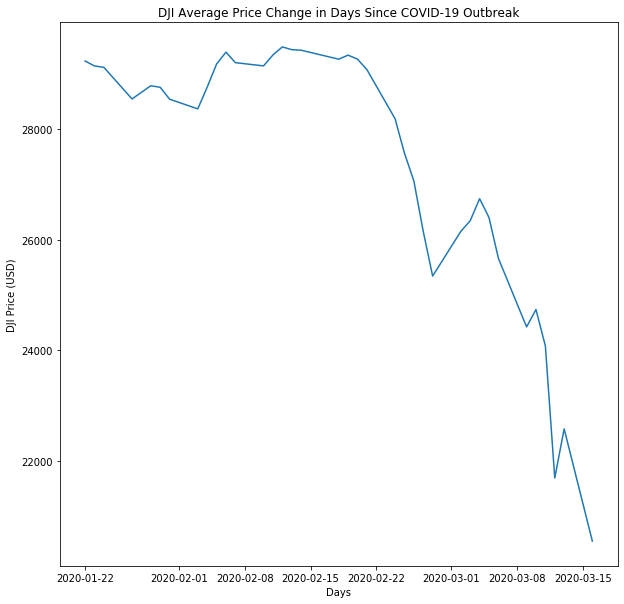

In [37]:
# Visualize results for ^DJI dataframe
fig = plt.figure(figsize=(10,10))
plt.plot(result_US_DJI["Date"], result_US_DJI["^DJI Average"])
plt.xlabel("Days")
plt.ylabel("DJI Price (USD)")
plt.title("DJI Average Price Change in Days Since COVID-19 Outbreak")
plt.show()

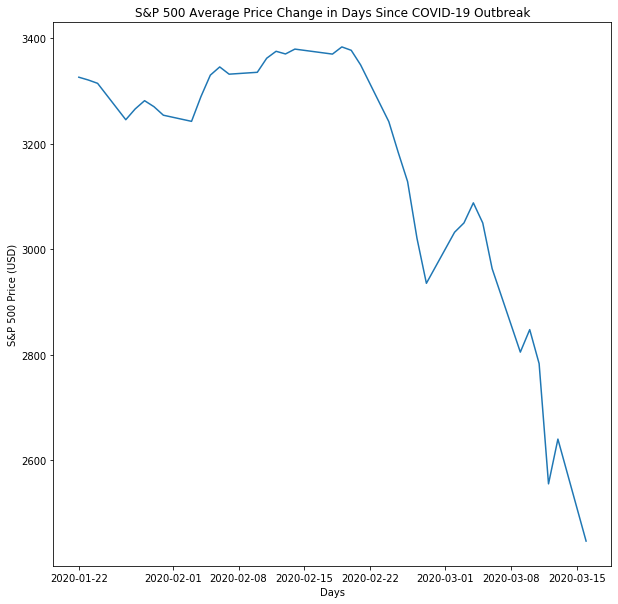

In [35]:
# Visualize results for S&P dataframe
fig = plt.figure(figsize=(10,10))
plt.plot(result_US_SP["Date"], result_US_SP["S&P Average"])
plt.xlabel("Days")
plt.ylabel("S&P 500 Price (USD)")
plt.title("S&P 500 Average Price Change in Days Since COVID-19 Outbreak")
plt.show()

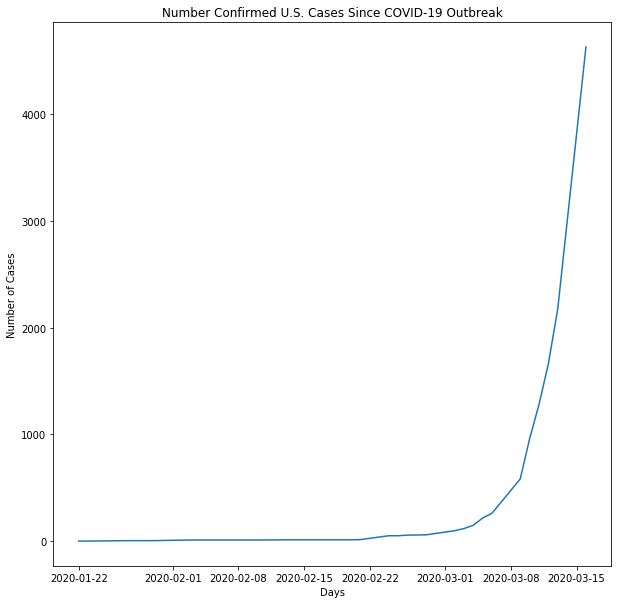

In [38]:
# Visualize results for COVID-19 dataframe

fig = plt.figure(figsize=(10,10))
plt.plot(result_US_DJI["Date"], result_US_DJI["National Confirmed Cases"])
plt.xlabel("Days")
plt.ylabel("Number of Cases")
plt.title("Number Confirmed U.S. Cases Since COVID-19 Outbreak")
plt.show()

Text(0.5, 1, 'Effect of the COVID-19 Outbreak on the Dow Jones Industrial Average')

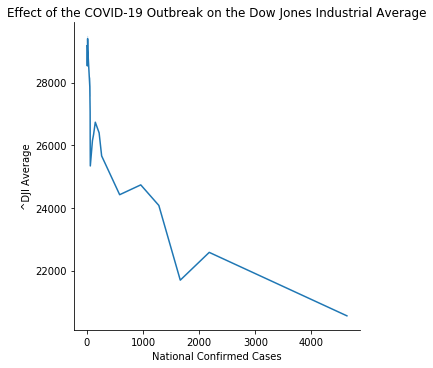

In [41]:
# Visualize relationship between ^DJI and COVID-19 datasets
plot1 = sns.relplot(x="National Confirmed Cases", y="^DJI Average", kind="line", data=result_US_DJI)
axes = plot1.axes.flatten()
axes[0].set_title("Effect of the COVID-19 Outbreak on the Dow Jones Industrial Average")

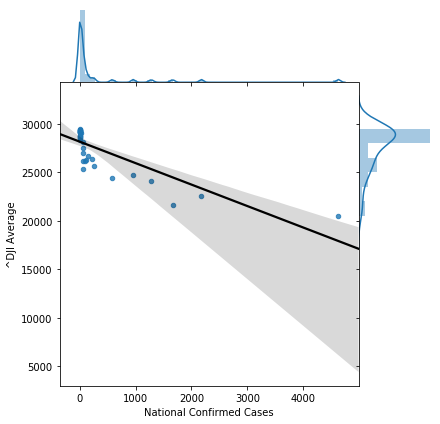

In [43]:
sns.jointplot(
    x='National Confirmed Cases', 
    y='^DJI Average', 
    data=result_US_DJI,
    stat_func=None,
    kind="reg",
    ratio=4,
    space=0,
    scatter_kws={
        's': 20,},
    line_kws={
        'color': 'black'
    }
);

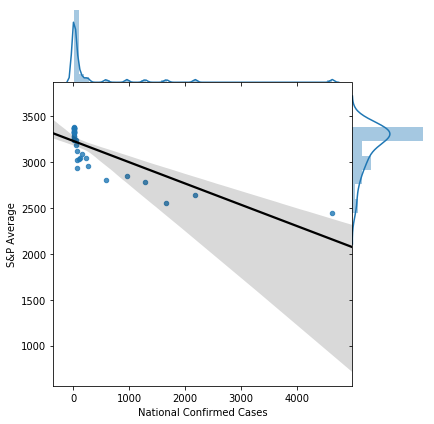

In [53]:
# Visualize the effect of the COVID-19 outbreak on the S&P 500
sns.jointplot(
    x='National Confirmed Cases', 
    y='S&P Average', 
    data=result_US_SP,
    stat_func=None,
    kind="reg",
    ratio=4,
    space=0,
    scatter_kws={
        's': 20,},
    line_kws={
        'color': 'black'
    }
);

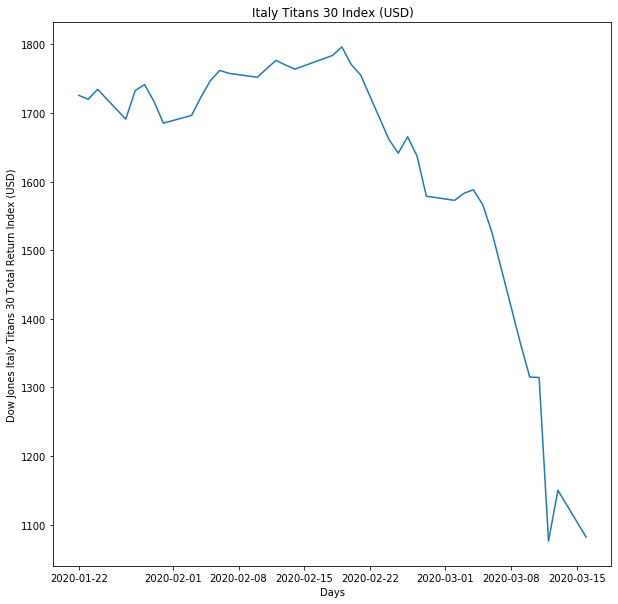

In [44]:
# Visualize results for italy titans 30 dataframe
fig = plt.figure(figsize=(10,10))
plt.plot(italy_data["Date"], italy_data["Dow Jones Italy Titans 30 Index (USD)"])
plt.xlabel("Days")
plt.ylabel("Dow Jones Italy Titans 30 Total Return Index (USD)")
plt.title("Italy Titans 30 Index (USD)")
plt.show()

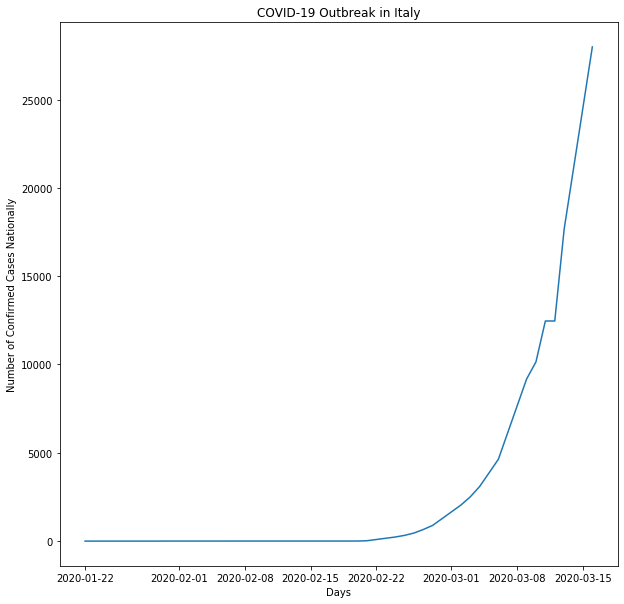

In [45]:
# Visualize results for italy COVID-19 dataframe
fig = plt.figure(figsize=(10,10))
plt.plot(result_IT["Date"], result_IT["National Confirmed Cases"])
plt.xlabel("Days")
plt.ylabel("Number of Confirmed Cases Nationally")
plt.title("COVID-19 Outbreak in Italy")
plt.show()

Text(0.5, 1, 'Effect of the COVID-19 Outbreak on the Italy Titans 30 Dow Jones Industrial Average')

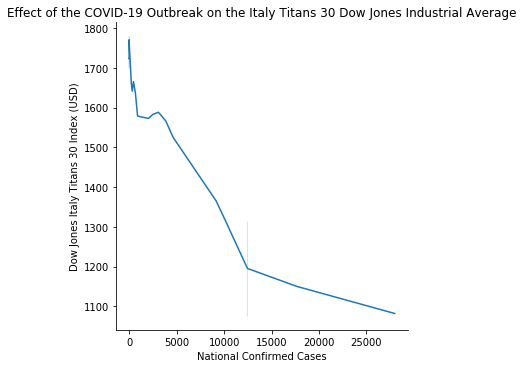

In [46]:
plot1 = sns.relplot(x="National Confirmed Cases", y="Dow Jones Italy Titans 30 Index (USD)", kind="line", data=result_IT)
axes = plot1.axes.flatten()
axes[0].set_title("Effect of the COVID-19 Outbreak on the Italy Titans 30 Dow Jones Industrial Average")

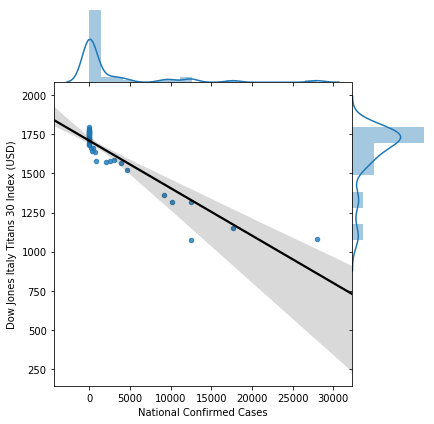

In [47]:
sns.jointplot(
    x='National Confirmed Cases', 
    y='Dow Jones Italy Titans 30 Index (USD)', 
    data=result_IT,
    stat_func=None,
    kind="reg",
    ratio=4,
    space=0,
    scatter_kws={
        's': 20,},
    line_kws={
        'color': 'black'
    }
);

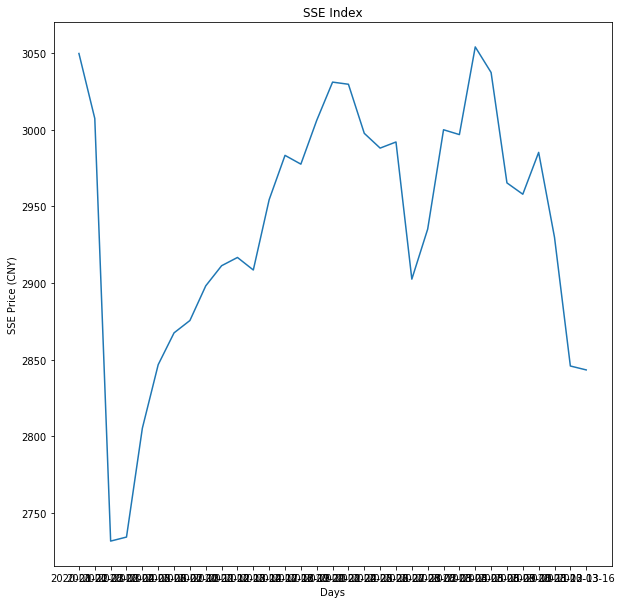

In [44]:
# Visualize results for italy titans 30 dataframe
fig = plt.figure(figsize=(10,10))
plt.plot(SSE_data["Date"], SSE_data["Average"])
plt.xlabel("Days")
plt.ylabel("SSE Price (CNY)")
plt.title("SSE Index")
plt.show()

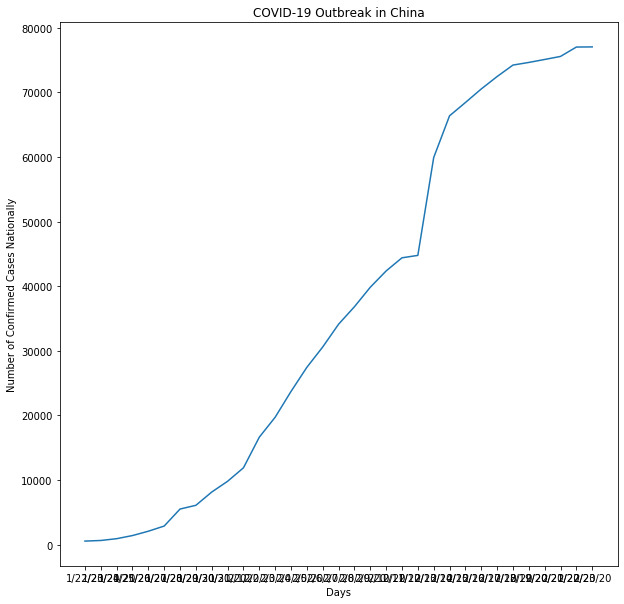

In [45]:
# Visualize results for China COVID-19 dataframe
fig = plt.figure(figsize=(10,10))
plt.plot(result_China["Date"], result_China["National Confirmed Cases"])
plt.xlabel("Days")
plt.ylabel("Number of Confirmed Cases Nationally")
plt.title("COVID-19 Outbreak in China")
plt.show()

Text(0.5, 1, 'Effect of the COVID-19 Outbreak on the China SSE Index')

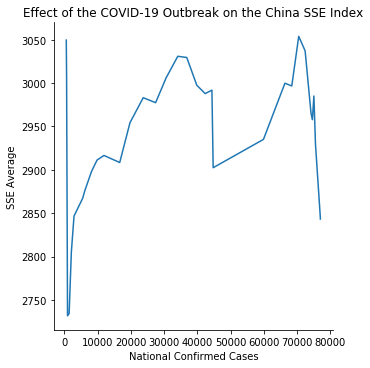

In [46]:
# View raltionship between COVID-19 cases and China SSE
plot1 = sns.relplot(x="National Confirmed Cases", y="SSE Average", kind="line", data=result_China)
axes = plot1.axes.flatten()
axes[0].set_title("Effect of the COVID-19 Outbreak on the China SSE Index")

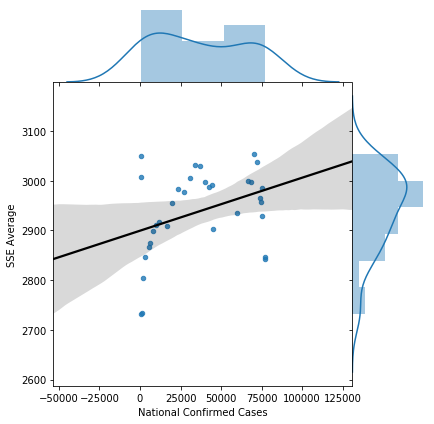

In [49]:
sns.jointplot(
    x='National Confirmed Cases', 
    y='SSE Average', 
    data=result_China,
    stat_func=None,
    kind="reg",
    ratio=4,
    space=0,
    scatter_kws={
        's': 20,},
    line_kws={
        'color': 'black'
    }
);

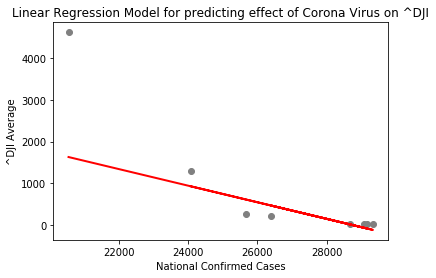

,Actual,Predicted
0,4632,1628.110418
1,15,-74.192784
2,13,-126.341489
3,217,460.071829
4,11,-94.245233
5,5,7.940705
6,262,607.107574
7,1281,923.338302


In [49]:
# Next we move to the predictive modeling portion of this project. First let's import our libraries
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# We will begin by first using a linear regression model (it is obvious that the models do not have strictly linear correlations so we are not doing this for accuracy just out of curiosity)
y_US=result_US_DJI["National Confirmed Cases"].values.reshape(-1,1)
x_US=result_US_DJI["^DJI Average"].values.reshape(-1,1)
x_train_US,x_test_US,y_train_US,y_test_US=train_test_split(x_US,y_US,test_size=0.2)

regressor = LinearRegression()  
regressor.fit(x_train_US, y_train_US)

y_pred_US = regressor.predict(x_test_US)
plt.scatter(x_test_US, y_test_US,  color='gray')
plt.plot(x_test_US, y_pred_US, color='red', linewidth=2)
plt.title("Linear Regression Model for predicting effect of Corona Virus on ^DJI")
plt.xlabel("National Confirmed Cases")
plt.ylabel("^DJI Average")
plt.show()

# As you can see our results are awful
df = pd.DataFrame({'Actual': y_test_US.flatten(), 'Predicted': y_pred_US.flatten()})
df

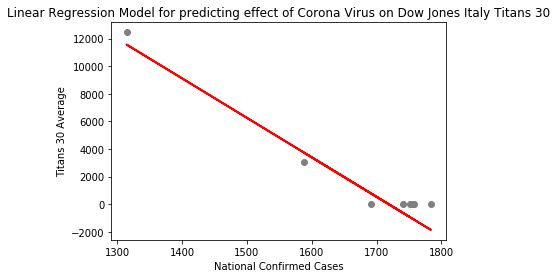

,Actual,Predicted
0,20,-1056.056844
1,3,-1869.846600
2,12462,11567.706425
3,0,786.280698
4,3,-961.563311
5,3089,3732.188163
6,0,-654.029814
7,3,-1123.347693


In [50]:
# Let's take a look at how bad they are for Italy
y_IT=result_IT["National Confirmed Cases"].values.reshape(-1,1)
x_IT=result_IT["Dow Jones Italy Titans 30 Index (USD)"].values.reshape(-1,1)
x_train_IT,x_test_IT,y_train_IT,y_test_IT=train_test_split(x_IT,y_IT,test_size=0.2)

regressor = LinearRegression()  
regressor.fit(x_train_IT, y_train_IT)

y_pred_IT = regressor.predict(x_test_IT)
plt.scatter(x_test_IT, y_test_IT,  color='gray')
plt.plot(x_test_IT, y_pred_IT, color='red', linewidth=2)
plt.title("Linear Regression Model for predicting effect of Corona Virus on Dow Jones Italy Titans 30")
plt.xlabel("National Confirmed Cases")
plt.ylabel("Titans 30 Average")
plt.show()

# As you can see our results are again awful
df = pd.DataFrame({'Actual': y_test_IT.flatten(), 'Predicted': y_pred_IT.flatten()})
df

In [54]:
# Let's now try using tensorflow to model our data and make predictions
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

train_dataset = result_US.drop(columns = "Date").sample(frac=0.8,random_state=0)
test_dataset = result_US.drop(columns= "Date").drop(train_dataset.index)

# sns.pairplot(train_dataset[["National Confirmed Cases", "^DJI Average"]], diag_kind="kde")

train_stats = train_dataset.describe()
train_stats.pop("^DJI Average")
train_stats = train_stats.transpose()
train_stats

train_labels = train_dataset.pop('^DJI Average')
test_labels = test_dataset.pop('^DJI Average')

def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)


def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

model = build_model()
# model.summary()


example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

EPOCHS = 1000

# history = model.fit(
#   normed_train_data, train_labels,
#   epochs=EPOCHS, validation_split = 0.2, verbose=0,
#   callbacks=[tfdocs.modeling.EpochDots()])

ModuleNotFoundError: No module named 'tensorflow_docs'